In [55]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import math
%matplotlib inline

## 데이터 불러오기

In [56]:
csv_path = "./00_data/"

In [57]:
df = pd.read_csv(csv_path+"BA_Total.csv")

In [58]:
df.head()

,원본 Folder,원본 No.,filename,성별,검사 시 나이,신장,체중,BMI,BA
0,BA(F-3yr)19명,001_F,org001.jpg,1,3.0,88.9,11.3,14.3,3.3
1,BA(F-3yr)19명,002_F,org002.jpg,1,3.0,95.9,13.5,14.7,1.8
2,BA(F-3yr)19명,003_F,org003.jpg,1,3.0,88.2,13.0,16.8,2.4
3,BA(F-3yr)19명,004_F,org004.jpg,1,3.2,88.7,12.9,16.4,2.3
4,BA(F-3yr)19명,005_F,org005.jpg,1,3.3,90.8,14.0,17.0,4.0


## 데이터 탐색

In [59]:
df.isnull().sum()

원본 Folder    0
원본 No.       0
filename     0
성별           0
검사 시 나이      0
신장           0
체중           0
BMI          0
BA           0
dtype: int64

In [60]:
df.describe()

,성별,검사 시 나이,신장,체중,BMI,BA
count,441.00000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,0.47619,5.708520,107.528345,17.774717,15.308617,5.292744
std,0.50000,1.303854,8.932463,3.503727,1.364524,1.527057
min,0.00000,3.000000,57.700000,5.700000,8.700000,1.800000
25%,0.00000,4.700000,101.300000,15.300000,14.300000,4.300000
50%,0.00000,5.800000,107.700000,17.250000,15.200000,5.300000
75%,1.00000,6.800000,114.200000,19.800000,16.200000,6.400000
max,1.00000,7.900000,134.900000,32.100000,22.200000,9.900000


### 골연령 그래프

In [61]:
# 파생변수 골연령(개월), 정규화된 값 추가
df['boneage'] = df.BA*12
ba_mean = df.boneage.mean()
ba_std = df.boneage.std()
df["BA_z"] = (df.boneage-ba_mean)/ba_std
df.head()

,원본 Folder,원본 No.,filename,성별,검사 시 나이,신장,체중,BMI,BA,boneage,BA_z
0,BA(F-3yr)19명,001_F,org001.jpg,1,3.0,88.9,11.3,14.3,3.3,39.6,-1.304957
1,BA(F-3yr)19명,002_F,org002.jpg,1,3.0,95.9,13.5,14.7,1.8,21.6,-2.287239
2,BA(F-3yr)19명,003_F,org003.jpg,1,3.0,88.2,13.0,16.8,2.4,28.8,-1.894327
3,BA(F-3yr)19명,004_F,org004.jpg,1,3.2,88.7,12.9,16.4,2.3,27.6,-1.959812
4,BA(F-3yr)19명,005_F,org005.jpg,1,3.3,90.8,14.0,17.0,4.0,48.0,-0.846559


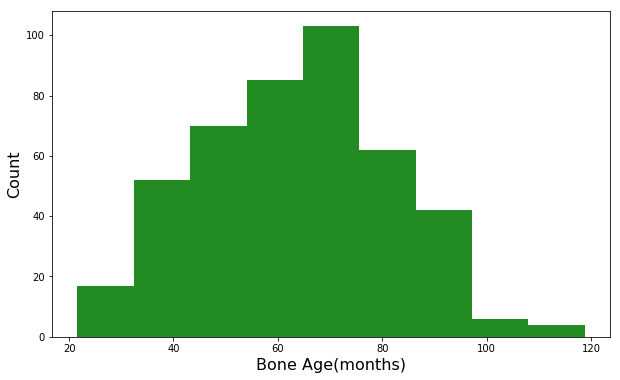

In [62]:
plt.figure(figsize=(10,6))
plt.hist(df['boneage'], bins=9, color = 'forestgreen')
plt.xlabel("Bone Age(months)", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

/home/centos/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/centos/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


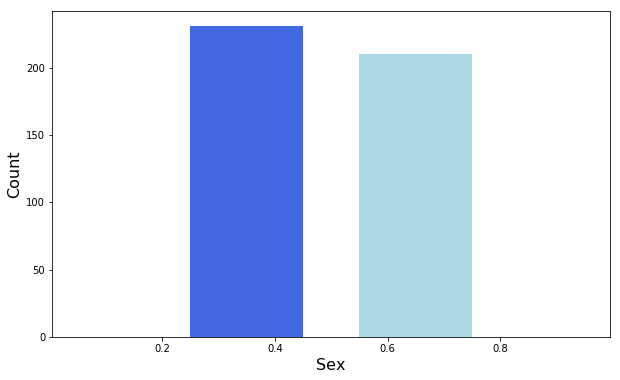

In [64]:
plt.figure(figsize=(10,6))
m = df["성별"].loc[df["성별"]==1]
f = df["성별"].loc[df["성별"]==0]
plt.hist([m, f], bins=2, color = ('lightblue', 'royalblue'))
plt.xlabel("Sex", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

### 성별-골연령 히스토그램

In [65]:
#파생변수 골연령대 추가
df["BA_GROUP"] = df["BA"].map(lambda x: int(x))
df.head()

,원본 Folder,원본 No.,filename,성별,검사 시 나이,신장,체중,BMI,BA,boneage,BA_z,BA_GROUP
0,BA(F-3yr)19명,001_F,org001.jpg,1,3.0,88.9,11.3,14.3,3.3,39.6,-1.304957,3
1,BA(F-3yr)19명,002_F,org002.jpg,1,3.0,95.9,13.5,14.7,1.8,21.6,-2.287239,1
2,BA(F-3yr)19명,003_F,org003.jpg,1,3.0,88.2,13.0,16.8,2.4,28.8,-1.894327,2
3,BA(F-3yr)19명,004_F,org004.jpg,1,3.2,88.7,12.9,16.4,2.3,27.6,-1.959812,2
4,BA(F-3yr)19명,005_F,org005.jpg,1,3.3,90.8,14.0,17.0,4.0,48.0,-0.846559,4


In [66]:
#성별 값 1, 2를 텍스트 Male, Female로 변경
df["성별"] = df["성별"].replace([0, 1], ["Male", "Female"])
df.head()

,원본 Folder,원본 No.,filename,성별,검사 시 나이,신장,체중,BMI,BA,boneage,BA_z,BA_GROUP
0,BA(F-3yr)19명,001_F,org001.jpg,Female,3.0,88.9,11.3,14.3,3.3,39.6,-1.304957,3
1,BA(F-3yr)19명,002_F,org002.jpg,Female,3.0,95.9,13.5,14.7,1.8,21.6,-2.287239,1
2,BA(F-3yr)19명,003_F,org003.jpg,Female,3.0,88.2,13.0,16.8,2.4,28.8,-1.894327,2
3,BA(F-3yr)19명,004_F,org004.jpg,Female,3.2,88.7,12.9,16.4,2.3,27.6,-1.959812,2
4,BA(F-3yr)19명,005_F,org005.jpg,Female,3.3,90.8,14.0,17.0,4.0,48.0,-0.846559,4


In [67]:
#성별, BA 연령대로 피벗테이블
df_ = df.loc[:, ["filename", "성별", "BA_GROUP"]]
df_pivot = df_.pivot_table(index=["성별"], columns=["BA_GROUP"], values=["filename"], aggfunc=["count"], fill_value=0, margins=True)
df_pivot

count                                     
         filename                                     
BA_GROUP        1   2   3   4    5   6   7   8  9  All
성별                                                    
Female          1  12  30  41   52  37  26   7  4  210
Male            1  10  40  44   61  49  19   6  1  231
All             2  22  70  85  113  86  45  13  5  441

/home/centos/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/centos/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


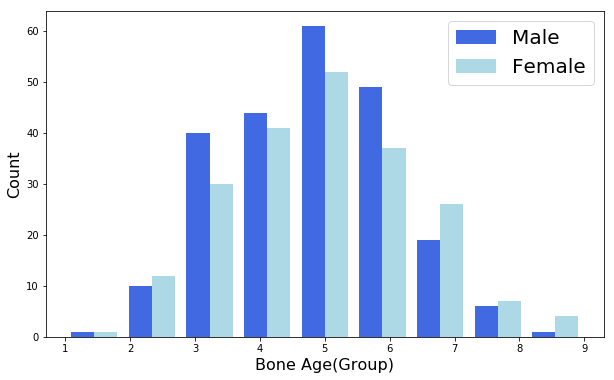

In [68]:
#골연령대 기준으로 히스토그램
plt.figure(figsize=(10,6))
m = df.loc[df["성별"]=="Male"]["BA_GROUP"]
f = df.loc[df["성별"]=="Female"]["BA_GROUP"]
plt.hist([m, f], bins=9, color = ['royalblue', 'lightblue'])
plt.legend(["Male", "Female"], fontsize=20)
plt.xlabel("Bone Age(Group)", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

/home/centos/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/centos/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


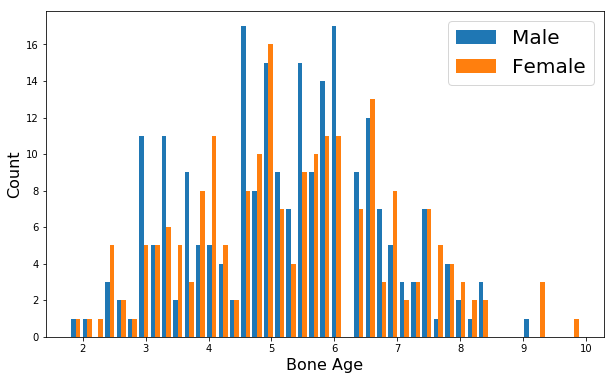

In [19]:
#골열령 기준으로 히스토그램
plt.figure(figsize=(10,6))
m = df.loc[df["성별"]=="Male"]["BA"]
f = df.loc[df["성별"]=="Female"]["BA"]
plt.hist([m, f], bins=45)
plt.legend(["Male", "Female"], fontsize=20)
plt.xlabel("Bone Age", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

### 신장-골연령 산점도

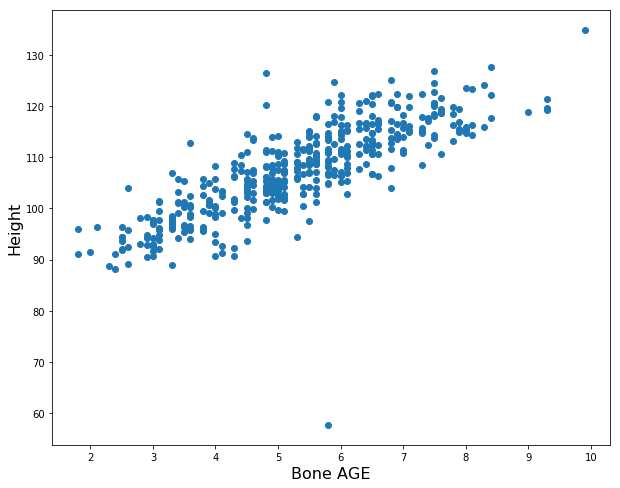

In [40]:
plt.figure(figsize=(10,8))
plt.scatter(x=df["BA"], y=df["신장"])
plt.xlabel("Bone AGE", fontsize=16)
plt.ylabel("Height", fontsize=16)
plt.show()